In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample
from tqdm.auto import tqdm

In [2]:
data_folder = '/usr/xtmp/zg78/stanford_dataset/'

In [8]:
def extraction(npz_data, data_folder, split):
    signals = npz_data['signal'][:, :, 0]
    qa_labels = npz_data['qa_label']
    rhyms = [x[1] for x in npz_data['rhythm']]
    
    resampled_sigs = []
    for sig in tqdm(signals):
        resamped_sig = resample(sig, 2400)
        normed_sig = (resamped_sig - np.min(resamped_sig)) / (np.max(resamped_sig) - np.min(resamped_sig))
        resampled_sigs.append(normed_sig)
        
    signals = np.asarray(resampled_sigs)
        
    np.save(data_folder+split+'signals.npy', signals)
    np.save(data_folder+split+'qa_labels.npy', qa_labels)
    np.save(data_folder+split+'rhyms.npy', rhyms)   

    plt.figure(figsize=(5, 1))
    plt.plot(signals[0])

  0%|          | 0/17617 [00:00<?, ?it/s]

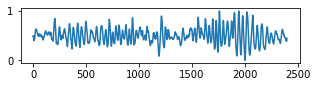

In [9]:
test_data = np.load(data_folder+'test.npz')
extraction(test_data, data_folder, 'test')

  0%|          | 0/518782 [00:00<?, ?it/s]

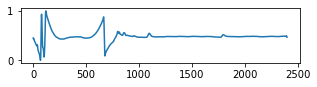

In [10]:
val_data = np.load(data_folder+'validate.npz')
extraction(val_data, data_folder, 'val')

  0%|          | 0/2803934 [00:00<?, ?it/s]

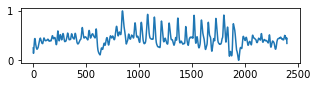

In [11]:
train_data = np.load(data_folder+'train.npz')
extraction(train_data, data_folder, 'train')

# Create clean training data

In [ ]:
split = 'train'
x = np.load(data_folder+split+'signals.npy')
y_qa = np.load(data_folder+split+'qa_labels.npy')
y_af = np.load(data_folder+split+'rhyms.npy') 

In [ ]:
x.shape

In [ ]:
x_noisy = x[y_qa[:, 0] == 1]
x_accpt = x[y_qa[:, 1] == 1]
x_clean = x[y_qa[:, 2] == 1]

In [ ]:
plt.figure(figsize=(5, 1))
plt.plot(x_clean[333])

In [ ]:
plt.figure(figsize=(5, 1))
plt.plot(x_accpt[333])

In [ ]:
plt.figure(figsize=(5, 1))
plt.plot(x_noisy[333])

In [ ]:
x_noisy.shape

In [ ]:
x_accpt.shape

In [ ]:
x_clean.shape

In [ ]:
x_accpt_clean = np.concatenate((x_accpt, x_clean), axis=0)
x_accpt_clean.shape

In [ ]:
y_af_accpt_clean = np.concatenate((y_af[y_qa[:, 1] == 1], y_af[[y_qa[:, 2] == 1]]), axis=0)
y_af_accpt_clean.shape

In [ ]:
np.save(data_folder+split+'x_accpt_clean.npy', x_accpt_clean)
np.save(data_folder+split+'y_af_accpt_clean.npy', y_af_accpt_clean)

In [21]:
!ls '/usr/xtmp/zg78/stanford_dataset/'

test.npz		  train.npz		     validate.npz
testqa_labels.npy	  trainqa_labels.npy	     valqa_labels.npy
testrhyms.npy		  trainrhyms.npy	     valrhyms.npy
testsignals.npy		  trainsignals.npy	     valsignals.npy
testx_accpt_clean.npy	  trainx_accpt_clean.npy     valx_accpt_clean.npy
testy_af_accpt_clean.npy  trainy_af_accpt_clean.npy  valy_af_accpt_clean.npy
